# Image Thresholding

### Simple Thresholding

If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). 

The function used is *cv2.threshold*. 

* First argument is the source image, which should be a grayscale image. 
* Second argument is the threshold value which is used to classify the pixel values. 
* Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 

OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

In [61]:
import cv2
import numpy as np

# Load our image as greyscale 
image = cv2.imread('img/gradient.jpg',0)
cv2.imshow('Original', image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)
cv2.waitKey(0) 
    
cv2.destroyAllWindows()

In [11]:
import cv2
import numpy as np

# Load our image as greyscale 
image = cv2.imread('img/old.jpg',0)
cv2.imshow('Original', image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)
cv2.waitKey(0) 
    
cv2.destroyAllWindows()

### Adaptive Thresholding

Before, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. 

In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

It has three ‘special’ input params and only one output argument.

**Adaptive Method - It decides how thresholding value is calculated.**

*cv2.ADAPTIVE_THRESH_MEAN_C* : threshold value is the mean of neighbourhood area.

*cv2.ADAPTIVE_THRESH_GAUSSIAN_C* : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

**Block Size** - It decides the size of neighbourhood area.

**C** - It is just a constant which is subtracted from the mean or weighted mean calculated.

Below piece of code compares global thresholding and adaptive thresholding for an image with varying illumination:

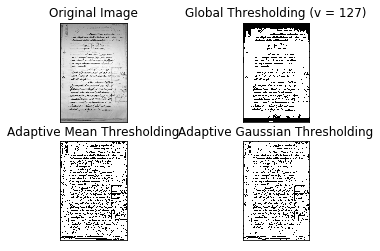

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/old.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otsu’s Binarization

Let's consider a bimodal image (*In simple words, bimodal image is an image whose histogram has two peaks*). For that image, we can approximately take a value in the middle of those peaks as threshold value, right ? That is what Otsu binarization does. So in simple words, **it automatically calculates a threshold value from image histogram for a bimodal image**.


**How Otsu’s Binarization Works?**

A Python implementation of Otsu’s binarization to show how it works actually. 

Since we are working with bimodal images, Otsu’s algorithm tries to find a threshold value (t) which minimizes the weighted within-class variance given by the relation :

![title](img/os.png)

where

![title](img/otsu.png)


It actually finds a value of t which lies in between two peaks such that variances to both classes are minimum. It can be simply implemented in Python as follows:

In [14]:
import cv2
import numpy as np

# Load our new image
image = cv2.imread('img/old.jpg', 0)

cv2.imshow('Original', image)
cv2.waitKey(0) 

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binary', thresh1)
cv2.waitKey(0) 

# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 3, 5) 
cv2.imshow("Adaptive Mean Thresholding", thresh) 
cv2.waitKey(0) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Otsu's Thresholding", th2) 
cv2.waitKey(0) 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Guassian Otsu's Thresholding", th3) 
cv2.waitKey(0) 

cv2.destroyAllWindows()

# Transformations

## Scaling

Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor.

Different interpolation methods are used. 

Preferable interpolation methods are *cv2.INTER_AREA* for shrinking and *cv2.INTER_CUBIC* (slow) & *cv2.INTER_LINEAR* for zooming. 

By default, interpolation method used is *cv2.INTER_LINEAR* for all resizing purposes.

In [19]:
import cv2
import numpy as np

img = cv2.imread('img/actress.jpg')

res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling', res)
cv2.waitKey()
cv2.destroyAllWindows()

## Translation

Translation is the shifting of object’s location. If you know the shift in (x,y) direction, let it be (*tx,ty*), you can create the transformation matrix **M** as follows:

![title](img/tra.png)

You can take make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine() function.

In [21]:
import cv2
import numpy as np

img = cv2.imread('img/actress.jpg',0)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,100]])
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Rotation

Rotation of an image for an angle *theta* is achieved by the transformation matrix of the form

![title](img/rot.png)

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

![title](img/rot1.png)

where:

![title](img/rot2.png)


To find this transformation matrix, OpenCV provides a function, *cv2.getRotationMatrix2D*.

In [22]:
# Method 1
import cv2
import numpy as np

image = cv2.imread('img/actress.jpg')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
cv2.imshow('original Image', image)
cv2.waitKey()
cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
## Method 2
img = cv2.imread('img/actress.jpg')

rotated_image = cv2.transpose(img)

cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

### Horizontal Flip

In [27]:
flipped = cv2.flip(img, 1)
cv2.imshow('Horizontal Flip', flipped) 
cv2.waitKey()
cv2.destroyAllWindows()

### Vertical Flip

In [28]:
flipped = cv2.flip(img, 0)
cv2.imshow('Horizontal Flip', flipped) 
cv2.waitKey()
cv2.destroyAllWindows()

### Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. 

To find the transformation matrix, we need three points from input image and their corresponding locations in output image. 

Then *cv2.getAffineTransform* will create a **2x3 matrix** which is to be passed to *cv2.warpAffine*.

In affine transforms you only need 3 coordiantes to obtain the correct transform


In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img/actress.jpg')
rows,cols,ch = image.shape

cv2.imshow('Original', image)
cv2.waitKey(0)

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getAffineTransform(points_A, points_B)

warped = cv2.warpAffine(image, M, (cols, rows))
 
cv2.imshow('warpPerspective', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Perspective Transformation

For perspective transformation, you need a **3x3 transformation matrix**. Straight lines will remain straight even after the transformation. 

To find this transformation matrix, you need **4 points** on the input image and corresponding points on the output image. 

Among these 4 points, 3 of them should not be collinear. 

Then transformation matrix can be found by the function *cv2.getPerspectiveTransform*. 

Then apply *cv2.warpPerspective* with this 3x3 transformation matrix.

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img/actress.jpg')

cv2.imshow('Original', image)
cv2.waitKey(0)

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(image, M, (420,594))
 
cv2.imshow('warpPerspective', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Smoothing Images

## 2D Convolution ( Image Filtering )
As for one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. A LPF helps in removing noise, or blurring the image. A HPF filters helps in finding edges in an image.

OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel can be defined as follows:

![title](img/imagefiltering.png)

Filtering with the above kernel results in the following being performed: for each pixel, a 5x5 window is centered on this pixel, all pixels falling within this window are summed up, and the result is then divided by 25. This equates to computing the average of the pixel values inside that window. This operation is performed for all the pixels in the image to produce the output filtered image. Try this code and check the result:

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/actress.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

cv2.imshow('Conv2D', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image Blurring (Image Smoothing)

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. (Well, there are blurring techniques which do not blur edges). OpenCV provides mainly four types of blurring techniques.

### Averaging

This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or cv2.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like this:

![title](img/averaging.png)

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/actress.jpg')

blur = cv2.blur(img,(5,5))
cv2.imshow('BLUR', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Gaussian Filtering

In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used. It is done with the function, *cv2.GaussianBlur()*. 

We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. 

If only sigmaX is specified, sigmaY is taken as equal to sigmaX. If both are given as zeros, they are calculated from the kernel size.

Gaussian filtering is highly effective in removing Gaussian noise from the image.

If you want, you can create a Gaussian kernel with the function, *cv2.getGaussianKernel()*.

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/actress.jpg')

blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow('Gaussian Filtering', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Median Filtering
The function cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value.

This is highly effective in removing salt-and-pepper noise.

One interesting thing to note is that, in the Gaussian and box filters, the filtered value for the central element can be a value which may not exist in the original image. 

However this is not the case in median filtering, since the central element is always replaced by some pixel value in the image. This reduces the noise effectively. The kernel size must be a positive odd integer.

In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/actress.jpg')

median = cv2.medianBlur(img,5)
cv2.imshow('Median Filtering', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Morphological Transformations

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. 

Two basic morphological operators are Erosion and Dilation. 

Then its variant forms like Opening, Closing, Gradient etc also comes into play. 

We will see them one-by-one with help of following image:

![title](img/op.png)

### Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). 

So what does it do? The kernel slides through the image (as in 2D convolution). 

A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happens is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image.

It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

Here, as an example, using 5x5 kernel with full of ones. Let’s see it how it works:


In [37]:
import cv2
import numpy as np

img = cv2.imread('img/op.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

cv2.imshow('Erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Dilation

It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. 

Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

In [38]:
import cv2
import numpy as np

img = cv2.imread('img/op.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

cv2.imshow('Dilation', dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Opening

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, *cv2.morphologyEx()*

In [39]:
import cv2
import numpy as np

img = cv2.imread('img/op.png',0)
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('Opening', opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Closing

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

In [40]:
import cv2
import numpy as np

img = cv2.imread('img/op.png',0)
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow('Closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Morphological Gradient
It is the difference between dilation and erosion of an image.


In [41]:
import cv2
import numpy as np

img = cv2.imread('img/op.png',0)
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

cv2.imshow('gradient', gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Contours

### What are contours?

Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.

*findContours function* modifies the source image. So if you want source image even after finding contours, already store it to some other variables.
In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.


Let’s see how to find contours of a binary image:



In [43]:
import numpy as np
import cv2

im = cv2.imread('img/actress.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt= contours[350]
img = cv2.d

cv2.imshow('Canny Edges After Contouring', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

 Three arguments in cv2.findContours() function, 
 * first one is source image, 
 * second is contour retrieval mode, 
 * third is contour approximation method. 
 
It outputs the image, contours and hierarchy. 

contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

In [46]:
import numpy as np
import cv2

im = cv2.imread('img/actress.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

print("Number of Contours found = " + str(len(contours)))


img = cv2.drawContours(img, contours, -1, (0,255,0), 3)
cv2.drawContours(im, contours, -1, (0,255,0), 3)

cv2.imshow('Contours', im)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 826


Let's Draw the 350th counter

In [60]:
import numpy as np
import cv2

im = cv2.imread('img/actress.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[350]
img = cv2.drawContours(im, [cnt], 0, (0,255,0), 3)

cv2.imshow('Contours', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Approximation Methods

Using cv2.CHAIN_APPROX_NONE stores all the boundary points. But we don't necessarily need all bounding points. If the points form a straight line, we only need the start and ending points of that line.

Using cv2.CHAIN_APPROX_SIMPLE instead only provides these start and end points of bounding contours, thus resulting in much more efficent storage of contour information.